In [1]:
# lets's import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Project Name: Heart Disease Prediction
- Heart Disease also refers as cardiovascular disease. Cardiovascular disease generally refers to conditions that involve         narrowed or blocked blood vessels, that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions       such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

- Heart Disease is one of the major concerns for society today.

- It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning       techniques are useful to predict the output from existing data.

## The Main Objecvtive of this Project is to predict whether a person is suffering from heart disease or not, using one of the most used datase the presence of Heart Disease in the patient.    

# Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variable
- finding and removing outliers

In [2]:
# Let's preview the dataset and also gives name to columns
heart = pd.read_csv('Heart_disease.csv',names=['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [3]:
# let's check the shape of the dataset

heart.shape

# The dataset hold 303 rows and 14 columns.

(303, 14)

In [4]:
# check dataset type
type(heart)

pandas.core.frame.DataFrame

In [5]:
 # let's check the data types of the columns presence in the dataset

heart.dtypes

# The whole dataset contains int and Float datatypes columns.

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [6]:
# Let's check information in detail about the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
# Let's look at each column in detail, get a better understanding of the dataset

heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# # let's check whether null value or not in the dataset

print('total number of null values:\n',heart.isnull().sum())
print('\n')
print('total number of Nan values:\n',heart.isna().sum())

total number of null values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


total number of Nan values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


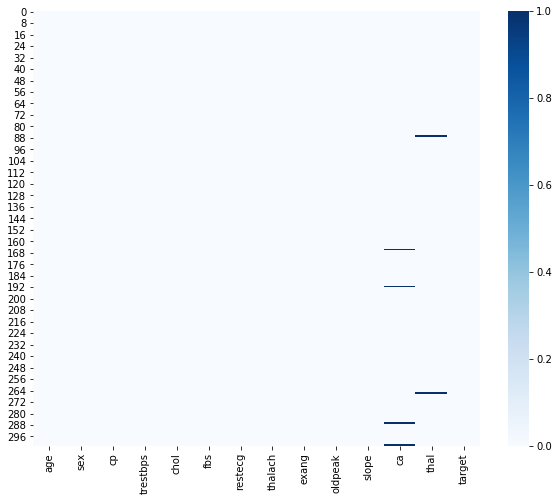

In [9]:
# let's visualize null values presence using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heart.isnull(),cmap='Blues')

# the below graph show, the dataset have null values in 'Ca' and 'thal' columns 

In [10]:
# univariate analysis of continuous type of data presence in the  dataset
# describe function provide  statistics summary of continuous variable.

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [11]:
# let's check how many unique columns presence in the dataset

col= heart.columns.values

list((columns,np.unique(heart[columns].astype(str)).size) for columns in col)


[('age', 41),
 ('sex', 2),
 ('cp', 4),
 ('trestbps', 50),
 ('chol', 152),
 ('fbs', 2),
 ('restecg', 3),
 ('thalach', 91),
 ('exang', 2),
 ('oldpeak', 40),
 ('slope', 3),
 ('ca', 5),
 ('thal', 4),
 ('target', 5)]

# Observation :-
- The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.
- We see that there are only 6 cells with null values with 4 belonging to attribute ca and 2 to thal.
- the dataset contains numerical and categorical data

## Input Variables description :-

- 1. Age: displays the age of the individual.
- 2. Sex: displays the gender of the individual like (male=1,female=0)
- 3. Chest-pain(cp) type: displays the type of chest-pain experienced by the individual using the following format :
     1 = typical angina
     2 = atypical angina
     3 = non — anginal pain
     4 = asymptotic
- 4. Resting Blood Pressure(trestbps): displays the resting blood pressure value of an individual in mmHg (unit)

- 5. Serum Cholestrol(chol): displays the serum cholesterol in mg/dl (unit)

- 6. Fasting Blood Sugar(fbs): compares the fasting blood sugar value of an individual with 120mg/dl.
      If fasting blood sugar  120mg/dl then : 1 (true),0 (false) 
      
- 7. Resting ECG(restecg) : displays resting electrocardiographic results
     0 = normal,1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy
     
- 8. Max heart rate achieved(thalach) : displays the max heart rate achieved by an individual.

- 9. Exercise induced angina(exang) : 1 = yes,0 = no

- 10. ST depression induced by exercise relative to rest(oldpeak): displays the value which is an integer or float.

- 11. Peak exercise ST segment(slope) :  1 = upsloping, 2 = flat, 3 = downsloping

- 12. Number of major vessels (0–3) colored by flourosopy(ca) : displays the value as integer or float.

- 13. displays the thalassemia(thal) : 3 = normal, 6 = fixed, defect7 = reversible defect

## Target / Output variable :-

- 14. Diagnosis of heart disease(target) : Displays whether the individual is suffering from heart disease or not :
      0 = absence, 1, 2, 3, 4 = present. 
      

# Statistic Summary Observation:-
- the mean is more than median(50th percentile) in all columns except age,sex,restecg,slope,
- there is a large difference in 75th -- - percentile and Max in trestbps,chol,thalach
- the 1 and 2 observation suggest that there outlier present in these three columns.


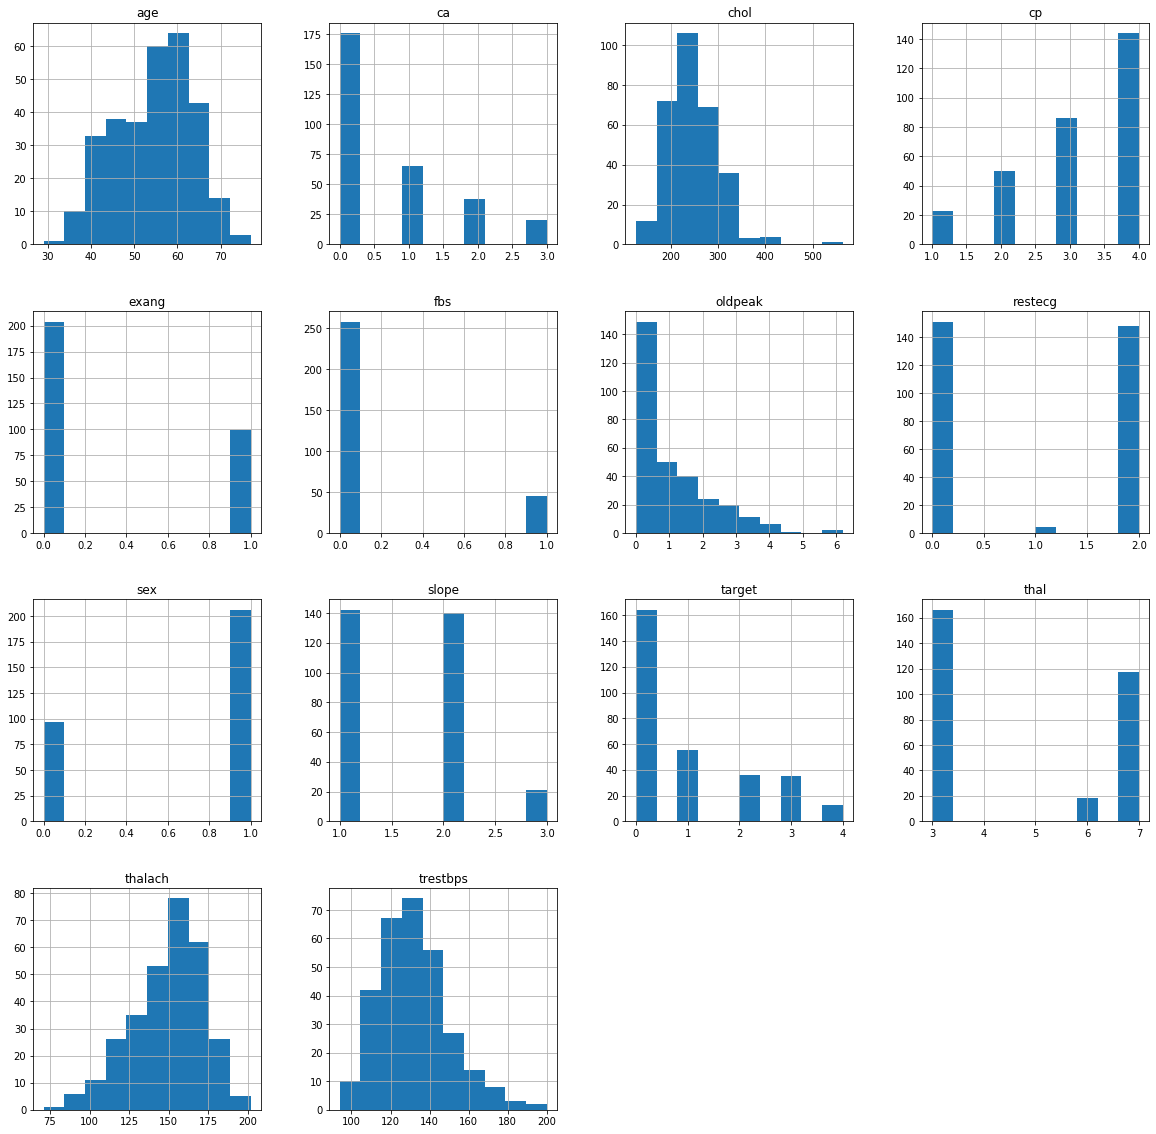

In [12]:
# Let's do some plotting to know how the data columns are distributed in the  dataset¶
# univariate data analysis by graphical representation
# let's plot histplot to check all feature in the dataset whether normal distribution or not

heart.hist(figsize=(20,20))
plt.show()



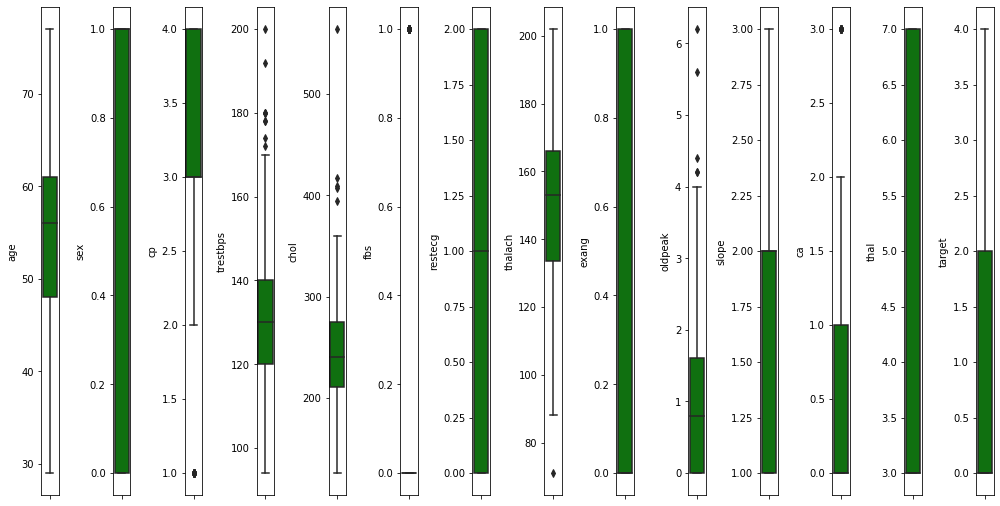

In [13]:
# Let,s plot boxplot to know oulier presence or not
collist=heart.columns.values
ncol=14
nrows=6

plt.figure(figsize=(ncol,ncol*3))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(heart[collist[i]],color='Green',orient='v')
    plt.tight_layout()
    
# it,s show presence of outliers in the trestbps,chol,thalach,fbs,oldpeek,ca columns

In [14]:
# let,s check skewness of the variable
heart.skew()

# from graph and data we observed Cholestrol,oldpeak,ca,trestbps column have skewedness so we need to remove 
# to transform in form of normal distribution

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
target      1.058496
dtype: float64

## Bivariate analysis - tacking two column or two variable and looking the relationship between them,and also find correlation and covariance within two variable¶¶

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

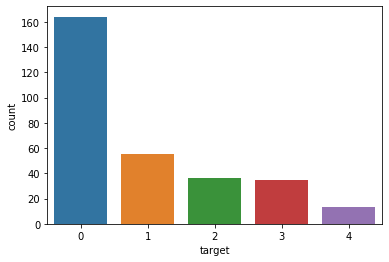

In [15]:
# Lets see  at the target variable to know whether the dataset balance or not 
sns.countplot(x='target',data=heart)
heart['target'].value_counts()

# Diagnosis of heart disease(target) : Displays whether the individual is suffering from heart disease or not :
# 0 = absence, 1, 2, 3, 4 = present.
# it shows most people who are not suffering from heart disease
# we can see that our dataset is balanced 

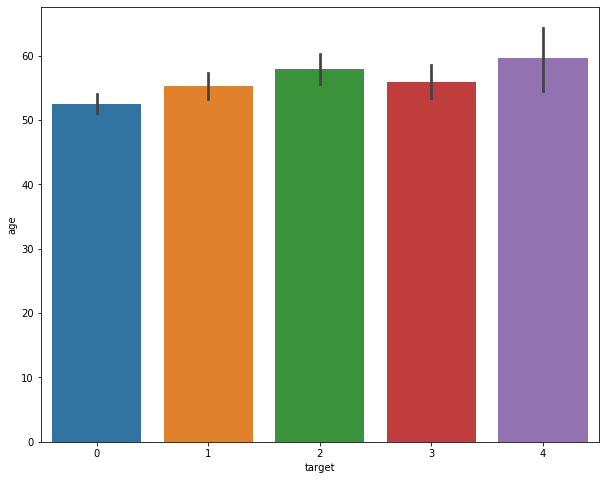

In [16]:
# let's plot age to know which age people suffering most
plt.figure(figsize=(10,8))
sns.barplot(x='target',y='age',data=heart)

# based on below graph we can say that most of the people who are suffering are age of 58, followed by 57.
# Majorly, people belonging to the age group 52+ are suffering from the disease.   

<Figure size 864x576 with 0 Axes>

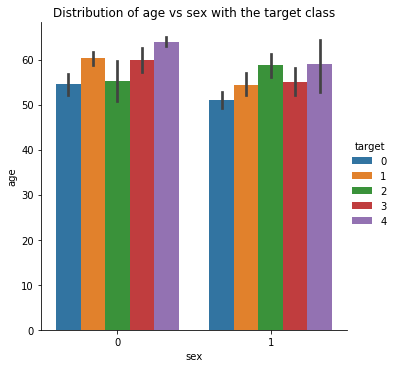

In [17]:
#  let's see  the distribution of sex# with target class
plt.figure(figsize=(12,8))
sns.catplot(kind = 'bar', data = heart, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

# We see that for females who are suffering from the disease are age above 60 than males age.

<Figure size 1440x1440 with 0 Axes>

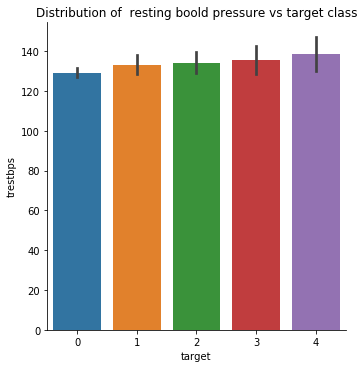

In [18]:
#  let's see  the distribution of resting blood  with target class
plt.figure(figsize=(20,20))
sns.catplot(kind = 'bar', data = heart, y = 'trestbps', x = 'target')
plt.title('Distribution of  resting boold pressure vs target class')
plt.show()

# we see that resting blood pressure is high  for people who are suffering from heart disease 
# than not suffering from heart diseas

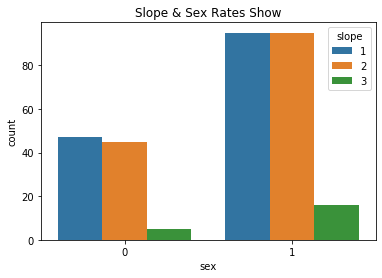

In [19]:
sns.countplot(x='sex',hue='slope',data=heart)
plt.title('Slope & Sex Rates Show')
plt.show()


In [20]:
#As seen, there are 4 types of chest pain.
heart.cp.value_counts()

4    144
3     86
2     50
1     23
Name: cp, dtype: int64

In [21]:
#let's mapping heart disease in binary form

heart['target'] = heart['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [22]:
# let's check count of target varible again
heart.target.value_counts()

0    164
1    139
Name: target, dtype: int64

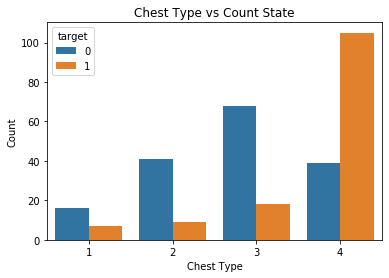

In [23]:
# let's see chest pain in order to target varible
sns.countplot(x='cp',data=heart,hue='target')
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

# accoeding to graph we are see that people who are suffering from heart disease they are belong chest pain category 4

In [24]:
# get correlation of each feature in the dataset
data= heart.corr()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


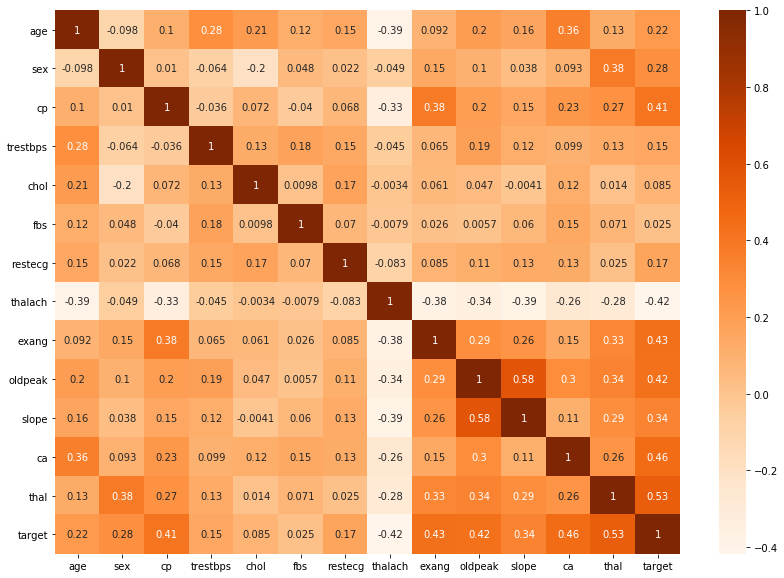

In [25]:
# visualize correlation matrix using heatmap

plt.figure(figsize=(14,10))
sns.heatmap(data,cmap='Oranges',annot=True) 

<Figure size 1440x1152 with 0 Axes>

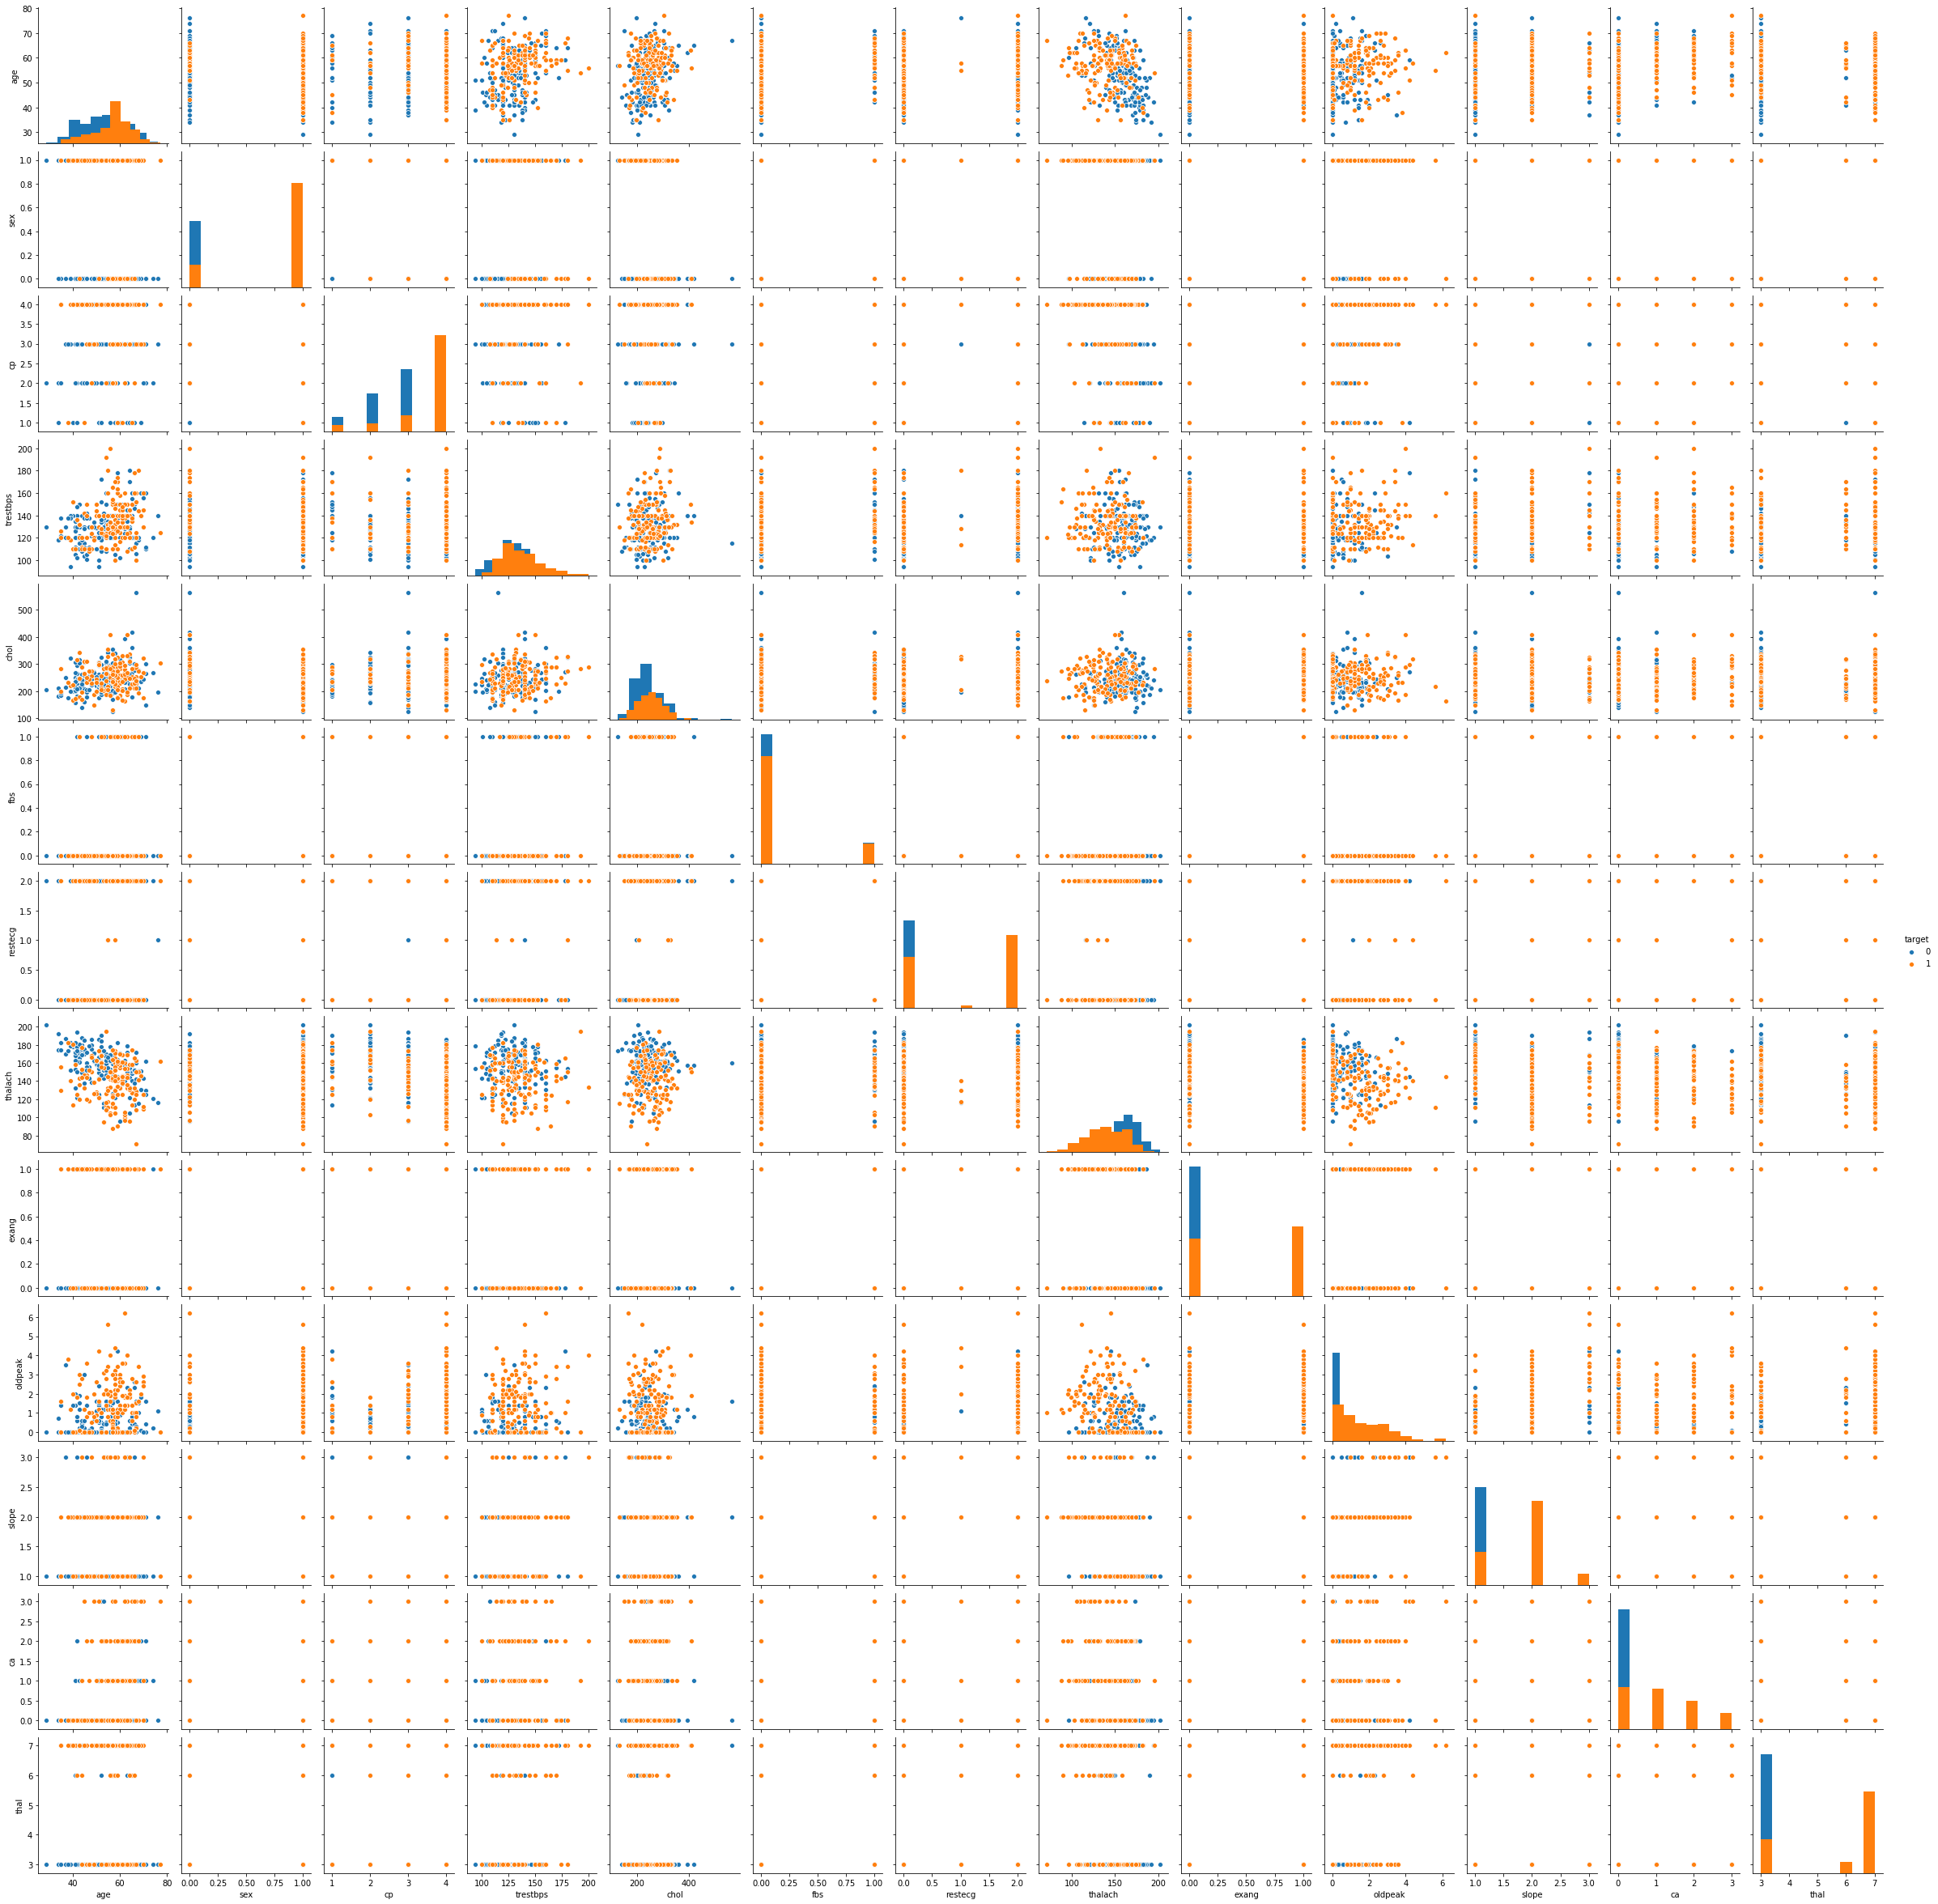

In [26]:
# let's plot pair plot to get more understanding
plt.figure(figsize=(20,16))
sns.pairplot(hue='target',data=heart, diag_kind='hist')

## observation :-
- dark shades are highly correlated with each other.
- from above observation we can say that all input varibles is strongly positive correlated with target varible except           Max heart rate achieved(thalach) varible it is negatively correlated with target varible.
- oldpeek and slop is highly positive correlated with each other.
- as we see numerical feature  is overlaped so we have to use classification algorithm to fit model and get prediction near by   actual prediction.

In [27]:
# let's fill the null values using mean()function

heart['thal'] = heart.thal.fillna(heart.thal.mean())
heart['ca'] = heart.ca.fillna(heart.ca.mean())

In [28]:
# let's check again whether null value or not
heart.isnull().sum()

# as per below data no missining value is present in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
# let's check and remove outliers in the dataset using z_score method
from scipy.stats import zscore

z_score=abs(zscore(heart))
print(heart.shape)
heart=heart.loc[(z_score<3).all(axis=1)]
print(heart.shape)

# we can see that 294 rows is pending  out of 303 rows and 14 columns are present after removing ouliers fron heart dataset.

(303, 14)
(294, 14)


In [30]:
#Now seperate the dataset as input variable and output variabes

x = heart.drop('target', axis = 1)
y = heart['target']

In [31]:
# let's treat skewness of dataset 

for feature in x.columns:
    if x.skew().loc[feature]>0.5:
        x[feature]=np.log1p(x[feature])
    

In [32]:
# let's see whether skewness remove or not
x.skew()

# from the below datas we say that skewness is remove from dataset

age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.163621
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     0.360728
slope       0.232500
ca          0.773468
thal        0.287884
dtype: float64

In [33]:
# let's check shape x and y
print(x.shape)
print(y.shape)

(294, 13)
(294,)


In [34]:
#Applying Standard scaling to get optimized result
#Lets bring features to common scale 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x =pd.DataFrame(df_x,columns=x.columns)

In [35]:
df_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.966261,0.669534,-2.228458,0.857151,-0.242431,2.416032,1.034659,0.006827,-0.696311,1.259636,2.020081,-0.779351,0.680441
1,1.408066,0.669534,0.886439,1.634660,0.916328,-0.413902,1.034659,-1.866380,1.436141,0.714774,0.765316,2.102309,-0.880287
2,1.408066,0.669534,0.886439,-0.636019,-0.329884,-0.413902,1.034659,-0.929777,1.436141,1.430398,0.765316,1.504311,1.200684
3,-1.905473,0.669534,-0.151860,-0.004721,0.129247,-0.413902,-0.979843,1.657032,-0.696311,1.868325,2.020081,-0.779351,-0.880287
4,-1.463667,-1.493576,-1.190159,-0.004721,-0.876468,-0.413902,1.034659,0.988030,-0.696311,0.634659,-1.003175,-0.779351,-0.880287


In [36]:
# Since we have target imbalance so we focus roc_auc_score and cross validation score
# Train and Test splitting of data 

df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = 42)  

In [37]:
print(df_x_train.shape)
print(y_train.shape)

(229, 13)
(229,)


In [38]:
print(df_x_test.shape)
print(y_test.shape)

(65, 13)
(65,)


# Our training and testing data is ready now to perform machine learning algorithm¶

## the heart disease prediction is a classification problem , so we can use Multiple classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check  accuracy      score level.
- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.

##  We will use the following algorithms

- Logistic Regression
- knn
- DecisionTrees
- Random Forests
- SVM


In [39]:
# let's make function to run multiple algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,df_x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(df_x_train,y_train)
        y_pred = mod.predict(df_x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [40]:
#Lets use logistic regression and check 
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
max_accuracyscore(lg,df_x,y)

max Accuracy_Score corresponding to  49  is  0.8923076923076924


49

In [41]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced
from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,df_x,y,cv=5,scoring="accuracy"))

# as we see below we get lesser r2 score 88% by cross val method as compare to train_test_split method

Mean accuracy score for Logistic Regression:  0.8196376388077148
standard deviation in accuracy score for Logistic Regression:  0.03698921424144287


cross val accuracy score: [0.83050847 0.86440678 0.76271186 0.84745763 0.79310345]


In [42]:
#Lets use KNN
#For KNN we need to know the best value of n_neighbors using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
Gv = GridSearchCV(knn, neighbors, cv=5,scoring="accuracy")
Gv.fit(df_x,y)
Gv.best_params_

{'n_neighbors': 18}

In [43]:
knn =KNeighborsClassifier(n_neighbors=18)
max_accuracyscore(knn,df_x,y)

max Accuracy_Score corresponding to  75  is  0.9230769230769231


75

In [44]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for KNeighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(knn,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8433080070134424
standard deviation in accuracy score for Kneighbors:  0.04189125504668109


cross val accuracy score: [0.86440678 0.88135593 0.81355932 0.88135593 0.77586207]


In [45]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
gv.fit(df_x,y)
gv.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [46]:
svc=SVC(kernel="linear",C=0.01)
max_accuracyscore(svc,df_x,y)

max Accuracy_Score corresponding to  75  is  0.9230769230769231


75

In [47]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,df_x,y,cv=5,scoring="accuracy"))

Mean accuracy score for SVC:  0.8502045587375804
standard deviation in accuracy score for SVC:  0.038398908662972284


cross val accuracy score: [0.84745763 0.91525424 0.81355932 0.86440678 0.81034483]


In [48]:
#Lets use Gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb =GradientBoostingClassifier()
gv = GridSearchCV(gb, parameters, cv=5,scoring="accuracy")
gv.fit(df_x,y)
gv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [49]:
gb =GradientBoostingClassifier(learning_rate=0.1,n_estimators=1000)
max_accuracyscore(gb,df_x,y)

max Accuracy_Score corresponding to  75  is  0.8769230769230769


75

In [50]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for GradientBoosting: ",cross_val_score(gb,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for GradientBoosting: ",cross_val_score(gb,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(gb,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for GradientBoosting:  0.8162478082992403
standard deviation in accuracy score for GradientBoosting:  0.045361426595406595


cross val accuracy score: [0.88135593 0.86440678 0.76271186 0.77966102 0.79310345]


In [51]:
#lets chcek decision tree
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
max_accuracyscore(dc,df_x,y)

max Accuracy_Score corresponding to  76  is  0.8769230769230769


76

In [52]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for Decisiontres: ",cross_val_score(dc,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for DecisionTress: ",cross_val_score(dc,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(dc,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for Decisiontres:  0.737989479836353
standard deviation in accuracy score for DecisionTress:  0.024216132452012134


cross val accuracy score: [0.72881356 0.74576271 0.69491525 0.69491525 0.72413793]


In [53]:
# let's draw roc_auc_curve for svc model because it is our final model 
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=lg.predict_proba(df_x_test)[:,1]

#predict_proba function will take test data and try to predict internaly the higher level of queue of given test data


In [54]:
y_pred_prob # it give you particular measurement of data

array([0.5579465 , 0.83730954, 0.13128802, 0.02912565, 0.95002258,
       0.4483104 , 0.71994932, 0.29435893, 0.7702226 , 0.3009149 ,
       0.76911818, 0.08566469, 0.98582849, 0.186116  , 0.98621028,
       0.27472397, 0.64977184, 0.89183972, 0.87196239, 0.03389729,
       0.91342446, 0.17284624, 0.13104051, 0.19511561, 0.04311027,
       0.97343564, 0.222004  , 0.97325341, 0.70664747, 0.53214777,
       0.32964873, 0.56870035, 0.15153258, 0.97644693, 0.83541631,
       0.02898809, 0.93073449, 0.09133982, 0.09614625, 0.96050511,
       0.05039455, 0.01226206, 0.06417105, 0.97866307, 0.94561127,
       0.41363242, 0.56586126, 0.18567345, 0.22213395, 0.17096036,
       0.96984988, 0.99097934, 0.02693094, 0.33594455, 0.81567256,
       0.55924162, 0.20065484, 0.27703231, 0.02459668, 0.98401911,
       0.18296809, 0.97830551, 0.90265407, 0.74759822, 0.91862995])

In [55]:
#after that we have draw auc_roc curve on certain value of FPR<TPR<threshold value where FPR AND TPR will come from ROC_curve value
# where FpR(recall) means TPR(1-specificity) and different tracehold value it is given text value to actual data and various probability data
# coming from roc score

In [56]:
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob) # text actual with predicted probality y


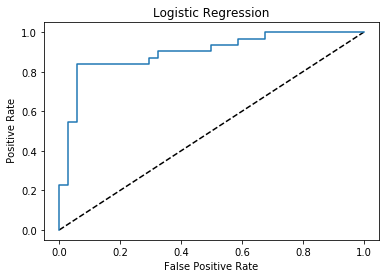

In [57]:
y_pred_prob=lg.predict_proba(df_x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Logistic Regression')
plt.show()

## I used multiple algorithms to  get highest accuracy score corresponding to random state

- we seen till now Knn classifier is  best model as comparision to other model which are apply in this  because we got max         cross_val accuracy score and also give good accuracy at random state 75

- So we save model knn classifier for production.


In [65]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state =75,test_size=0.22)
knn =KNeighborsClassifier(n_neighbors=18)
knn.fit(df_x_train,y_train)
y_pred=knn.predict(df_x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[23  9]
 [27  6]]
classification report 
               precision    recall  f1-score   support

           0       0.46      0.72      0.56        32
           1       0.40      0.18      0.25        33

    accuracy                           0.45        65
   macro avg       0.43      0.45      0.41        65
weighted avg       0.43      0.45      0.40        65



In [66]:
print("Mean accuracy score for KNeighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(knn,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8433080070134424
standard deviation in accuracy score for Kneighbors:  0.04189125504668109


cross val accuracy score: [0.86440678 0.88135593 0.81355932 0.88135593 0.77586207]


In [70]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(knn,'Heart_disease.pkl')

['Heart_disease.pkl']